In [1]:
from collections import defaultdict

from dbpedia import DBPedia
import utils

wrapper = DBPedia()
huric_utils = utils.HuricUtils()
language_utils = utils.LanguageUtils('en')
graph_utils = utils.GraphUtils()

['http://dbpedia.org/resource/Book', 'http://dbpedia.org/resource/Towel', 'http://dbpedia.org/resource/Mug', 'http://dbpedia.org/resource/Bed']
types []
all types dict_keys(['http://dbpedia.org/resource/Set'])
types ['http://dbpedia.org/ontology/MusicalWork']
all types dict_keys(['http://dbpedia.org/ontology/MusicalWork', 'http://dbpedia.org/resource/Piece'])
types ['http://dbpedia.org/ontology/SportsEvent']
all types dict_keys(['http://dbpedia.org/ontology/SportsEvent', 'http://dbpedia.org/resource/Cup', 'http://dbpedia.org/ontology/Company', 'http://dbpedia.org/resource/Container', 'http://dbpedia.org/ontology/Software', 'http://dbpedia.org/resource/Tool'])
types ['http://dbpedia.org/ontology/MusicalWork']
all types dict_keys(['http://dbpedia.org/ontology/MusicalWork', 'http://dbpedia.org/resource/Piece'])


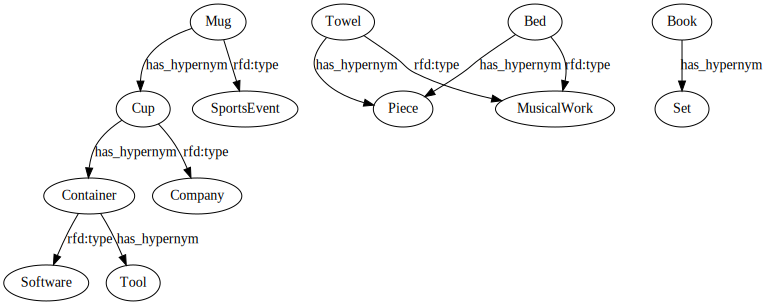

In [2]:
things = ['book', 'bath towel', 'coffee mug', 'bed']
things = [wrapper.get_id(el) for el in things]
print(things)
all_edges = set()
for w in things:
    types = wrapper.get_types(w, False)
    print('types', types)
    all_types, edges = wrapper.get_all_types(w, False)
    print('all types', all_types)
    #g = graph_utils.create_graph(edges)
    all_edges.update(edges)

graph_utils.create_graph(all_edges, wrapper.get_name)

In [3]:
frame_elements = huric_utils.get_frame_elements_values('Theme')
frame_lemmas = set()
for el in frame_elements:
    lemma = language_utils.semantic_head_lemmatize(el)
    #print(el, ':', lemma)
    frame_lemmas.add(lemma) 
print(frame_lemmas)

{'mayo', 'soap', 'rag', 'jar', 'shampoo', 'roll', 'detergent', 'pan', 'bag', 'envelope', 'laptop', 'folder', 'table', 'lot', 'reading', 'glass', 'mug', 'some', 'message', 'control', 'be', 'trouser', 'bin', 'paper', 'coke', 'telephone', 'napkin', 'phone', 'postcard', 'trash', 'knife', 'pot', 'box', 'computer', 'juice', 'bottle', 'cereal', 'plate', 'cup', 'fridge', 'yogurt', 'tablecloth', 'cushion', 'bread', 'fork', 'thing', 'paperback', 'mustard', 'towel', 'tub', 'apple', 'fruit', 'bed', 'clothe', 'beer', 'water', 'kettle', 'slipper', 'screwdriver', 'one', 'on', 'newspaper', 'sink', 'jacket', 'can', 'tablet', 'of', 'cigarette', 'pillow', 'garbage', 'catalogue', 'lanyard', 'remote', 'tray', 'pack', 'pasta', 'milk', 'book', 'radio', 'cellphone', 'eyeglass', 'person', 'chair', 'magazine', 'wristwatch', 'mobile', 'aspirin', 'coat', 'vase', 'couch'}


mayo http://dbpedia.org/resource/Mayo dict_keys([])
soap http://dbpedia.org/resource/Soap dict_keys(['http://dbpedia.org/ontology/ChemicalCompound', 'http://dbpedia.org/resource/Salt', 'http://dbpedia.org/ontology/Mineral', 'http://dbpedia.org/resource/Mineral'])
rag http://dbpedia.org/resource/Rag dict_keys([])
jar http://dbpedia.org/resource/Jar dict_keys([])
shampoo http://dbpedia.org/resource/Shampoo dict_keys(['http://dbpedia.org/ontology/Software', 'http://dbpedia.org/resource/Product'])
roll http://dbpedia.org/resource/Roll dict_keys([])
detergent http://dbpedia.org/resource/Detergent dict_keys(['http://dbpedia.org/ontology/ChemicalCompound', 'http://dbpedia.org/resource/Surfactant', 'http://dbpedia.org/resource/Compounds'])
pan http://dbpedia.org/resource/Pan dict_keys([])
bag http://dbpedia.org/resource/Bag dict_keys(['http://dbpedia.org/ontology/Software', 'http://dbpedia.org/resource/Tool'])
envelope http://dbpedia.org/resource/Envelope dict_keys(['http://dbpedia.org/ontolog

catalogue http://dbpedia.org/resource/Catalog dict_keys([])
lanyard http://dbpedia.org/resource/Lanyard dict_keys(['http://dbpedia.org/ontology/Ligament', 'http://dbpedia.org/resource/Cord'])
remote http://dbpedia.org/resource/Remote dict_keys([])
tray http://dbpedia.org/resource/Tray dict_keys(['http://dbpedia.org/ontology/Company', 'http://dbpedia.org/resource/Platform'])
pack http://dbpedia.org/resource/Pack dict_keys([])
pasta http://dbpedia.org/resource/Pasta dict_keys(['http://dbpedia.org/ontology/Food', 'http://dbpedia.org/resource/Food'])
milk http://dbpedia.org/resource/Milk dict_keys([])
book http://dbpedia.org/resource/Book dict_keys(['http://dbpedia.org/resource/Set'])
radio http://dbpedia.org/resource/Radio dict_keys(['http://dbpedia.org/resource/Use'])
cellphone http://dbpedia.org/resource/Mobile_phone dict_keys(['http://dbpedia.org/ontology/Company', 'http://dbpedia.org/resource/Telephone', 'http://dbpedia.org/ontology/Device', 'http://dbpedia.org/resource/Device'])
eyeg

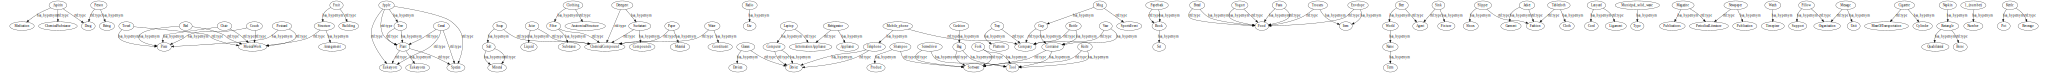

In [4]:
all_hyperonyms = defaultdict(lambda: 0)
all_edges = set()
for w in frame_lemmas:
    id = wrapper.get_id(w)
    hyperonyms, edges = wrapper.get_all_types(id)
    print(w, id, hyperonyms)
    for w in hyperonyms:
        all_hyperonyms[w] += 1
    all_edges.update(edges)

graph_utils.create_graph(all_edges, wrapper.get_name)

In [5]:
sorted_hyperonyms = sorted([(k,v) for k,v in all_hyperonyms.items()], key=lambda el: el[1], reverse=True)
print(sorted_hyperonyms)

[('http://dbpedia.org/ontology/Software', 10), ('http://dbpedia.org/resource/Tool', 9), ('http://dbpedia.org/ontology/ChemicalCompound', 6), ('http://dbpedia.org/ontology/Device', 6), ('http://dbpedia.org/ontology/Company', 6), ('http://dbpedia.org/ontology/MusicalWork', 6), ('http://dbpedia.org/ontology/Food', 5), ('http://dbpedia.org/resource/Device', 5), ('http://dbpedia.org/resource/Piece', 5), ('http://dbpedia.org/resource/Container', 4), ('http://dbpedia.org/resource/Food', 3), ('http://dbpedia.org/ontology/Fashion', 3), ('http://dbpedia.org/resource/Item', 2), ('http://dbpedia.org/ontology/InformationAppliance', 2), ('http://dbpedia.org/ontology/Organisation', 2), ('http://dbpedia.org/ontology/Eukaryote', 2), ('http://dbpedia.org/ontology/Plant', 2), ('http://dbpedia.org/ontology/Species', 2), ('http://dbpedia.org/resource/Set', 2), ('http://dbpedia.org/ontology/Agent', 2), ('http://dbpedia.org/ontology/PeriodicalLiterature', 2), ('http://dbpedia.org/ontology/Drug', 2), ('http:/